# Load Packages/Libraries

In [1]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")



In [2]:
# Dataset
df=pd.read_csv('../input/microbes-dataset/microbes.csv')
df.head(20)

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.1500,22.3,2.970,...,2.97,1.340,1.610,0.683,0.1950,3.630,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.6000,22.5,5.410,...,5.47,1.520,1.520,1.010,0.2150,6.010,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.0000,22.4,5.960,...,5.96,1.630,1.380,1.110,0.1820,6.550,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.9400,21.9,8.810,...,8.88,2.040,2.120,0.715,0.3710,10.300,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.5800,11.9,10.200,...,10.20,7.780,6.210,6.800,4.4400,14.000,9.55,17.600,7.99,Spirogyra
5,5,9.47,18.4,4.27,14.60,0.400,7.29,20.1000,22.5,13.600,...,13.60,1.080,1.070,0.963,0.1360,14.100,15.50,0.812,7.99,Spirogyra
6,6,13.50,19.8,4.50,17.30,0.493,9.67,0.0334,22.2,16.800,...,16.90,1.170,0.981,0.381,0.1070,17.200,7.88,0.903,7.99,Spirogyra
7,7,15.60,19.6,4.16,19.60,0.352,12.10,0.6270,22.3,19.300,...,19.30,0.979,0.845,0.328,0.0789,19.500,12.30,0.771,7.99,Spirogyra
8,8,8.95,20.0,8.59,3.28,1.520,5.50,9.0800,21.1,1.200,...,1.22,2.770,2.260,3.420,0.5760,3.320,11.60,3.240,9.69,Spirogyra
9,9,11.20,17.4,3.53,4.33,0.332,8.37,14.7000,22.6,3.600,...,3.60,0.896,0.966,0.347,0.0801,4.130,9.27,0.560,9.69,Spirogyra


Removing unnamed column

In [3]:
#Removing 
df = df.drop(['Unnamed: 0'], axis = 1)


# EDA

In [4]:
# Duplicates VALUE 

print(f'Duplicates in the dataset: {df.duplicated().sum()}')
print(f'Percentage of duplicates: {df.duplicated().sum()/len(df)*100}%')


Duplicates in the dataset: 25653
Percentage of duplicates: 84.03380613882793%


There are so many duplicates, they need to be removed. I also expect that the shape of the dataset will be greatly reduced.


In [5]:
df = df.drop_duplicates()
print(f'Duplicates in the dataset: {df.duplicated().sum()}')
print(f'Percentage of duplicates: {df.duplicated().sum()/len(df)}%')
print(f'Dataset shape: {df.shape}')


Duplicates in the dataset: 0
Percentage of duplicates: 0.0%
Dataset shape: (4874, 25)


Almost all features are continuous except for the microorganism which is categorical because it has 10 values. And upon checking from the head, the microorganisms has a dtype of object.



In [6]:
#Cardinality 
df.nunique()



Solidity            883
Eccentricity        247
EquivDiameter       953
Extrema             750
FilledArea         1601
Extent             1001
Orientation        1075
EulerNumber          81
BoundingBox1        781
BoundingBox2        637
BoundingBox3        518
BoundingBox4        505
ConvexHull1         775
ConvexHull2         775
ConvexHull3         793
ConvexHull4         860
MajorAxisLength    1298
MinorAxisLength    1286
Perimeter          1414
ConvexArea         1796
Centroid1           976
Centroid2           958
Area               1525
raddi               410
microorganisms       10
dtype: int64

In [7]:
#Data Types 
df.dtypes



Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

* The microorgranisms feature really has an object dtype. The others have continuous values.



Text(0.5, 1.0, 'Target distribution')

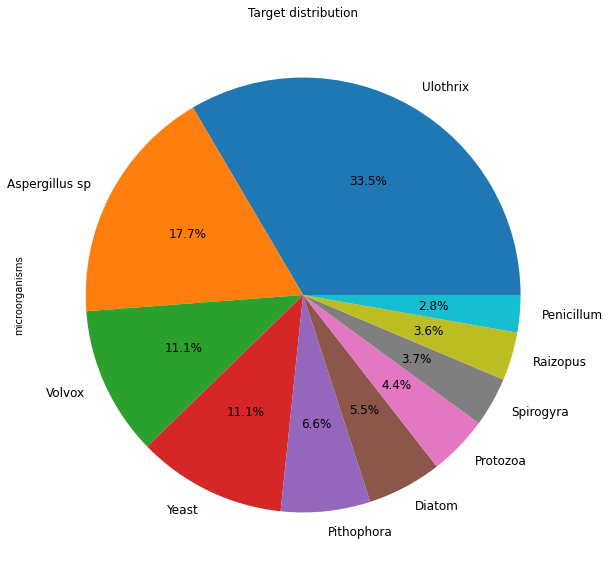

In [8]:
# Target Distribution
# Figure size 
plt.figure(figsize=(10,10))
# Pie plot
df['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution")


In [9]:
df['microorganisms'].value_counts()


Ulothrix          1631
Aspergillus sp     864
Volvox             540
Yeast              540
Pithophora         324
Diatom             270
Protozoa           216
Spirogyra          179
Raizopus           175
Penicillum         135
Name: microorganisms, dtype: int64

**The targets are not evenly distributed. The strategy that I will be using to this unbalanced dataset is undersampling.**

Since my target is to identify if a microorganism is Ulothrix or not, my strategy is to get a sample from other microorganisms equal to the number of the lowest one which is Spirogyra. So what will happen is I will get 135 samples from other microorganism except Ulothrix, then combine all of them. That part of the dataset is the **Not Ulothrix** part and will contain 135x9=1215 rows. The 'Ulothrix' part of the dataset will be reduced from 1631 rows to 1215 rows to make the dataset balanced between 'Not Ulothrix' and 'Ulothrix'.



In [10]:
#Encoding First the 'Not Ulothrix' part of the dataset.
df.loc[df['microorganisms'] != 'Ulothrix', 'microorganisms'] = 'Not Ulothrix'
#Applying undersampling

In [11]:
# Function for balancing
def sampling_k_elements(microCount, k=1215):
    if len(microCount) < k:
        return microCount
    return microCount.sample(k)

df = df.groupby('microorganisms').apply(sampling_k_elements).reset_index(drop=True)
df['microorganisms'].value_counts()


Not Ulothrix    1215
Ulothrix        1215
Name: microorganisms, dtype: int64

Now that the dataset is reduced, the shape should be smaller.


In [12]:
print(f'DATASET INFORMATON AFTER REDUCING DUBLICATE VALUES ')
print(f'Dataset shape: {df.shape}')
print()
print('Dataset head:')
df.head(10)


DATASET INFORMATON AFTER REDUCING DUBLICATE VALUES 
Dataset shape: (2430, 25)

Dataset head:


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,12.10,22.8,0.625,8.470,0.00781,3.38,15.500,23.0,8.160,15.90,...,8.180,0.330,0.0596,0.0704,0.00272,8.210,15.90,0.0205,0.126,Not Ulothrix
1,13.00,15.4,3.330,21.700,0.22700,10.50,0.459,22.3,21.600,13.30,...,21.600,0.694,0.8500,0.5780,0.06110,21.900,13.90,0.4990,3.850,Not Ulothrix
2,7.72,21.0,1.930,5.710,0.06920,6.41,13.000,22.8,5.120,12.70,...,5.120,0.761,0.5090,0.3540,0.03530,5.370,12.90,0.1720,0.898,Not Ulothrix
3,7.78,22.5,0.987,0.345,0.02060,3.81,2.480,22.9,0.247,18.30,...,0.247,0.478,0.1500,0.1530,0.00978,0.148,18.70,0.0478,1.650,Not Ulothrix
4,11.70,21.4,5.740,11.900,0.75300,5.98,7.310,22.3,11.500,5.42,...,11.500,1.850,1.1200,0.5780,0.20000,12.500,6.76,1.4600,6.680,Not Ulothrix
5,6.78,22.3,1.390,5.700,0.03630,3.89,21.900,22.9,5.470,10.70,...,5.470,0.680,0.2600,0.2440,0.02140,5.540,11.50,0.0916,2.340,Not Ulothrix
6,10.40,22.9,3.170,6.630,0.17600,2.85,20.200,22.8,5.500,7.20,...,6.440,1.780,0.2270,0.4470,0.06900,5.940,8.81,0.4520,6.560,Not Ulothrix
7,8.82,22.0,8.220,13.600,1.43000,4.54,3.830,21.4,11.900,5.30,...,11.900,3.280,1.5700,1.2800,0.53500,13.500,7.73,2.9700,5.930,Not Ulothrix
8,12.00,20.7,1.770,17.500,0.06050,6.03,18.400,22.8,17.000,17.70,...,17.100,0.507,0.3540,0.1990,0.01930,17.100,18.20,0.1460,1.280,Not Ulothrix
9,6.65,18.6,2.250,3.340,0.09320,3.92,12.500,22.7,2.950,17.30,...,2.950,0.803,0.7740,0.4310,0.05510,3.340,17.90,0.2320,5.810,Not Ulothrix


In [13]:
df.tail(10)


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
2420,15.10,15.2,3.07,20.00,0.1870,11.20,1.92,22.7,19.90,10.00,...,19.90,0.610,0.755,0.323,0.0451,20.10,10.70,0.426,5.71,Ulothrix
2421,13.90,21.4,4.48,13.40,0.4050,7.68,14.90,22.4,11.80,7.04,...,11.80,1.270,0.776,0.520,0.1020,12.70,7.78,0.892,7.36,Ulothrix
2422,7.91,20.1,3.73,18.40,0.2450,5.29,4.72,22.8,18.10,3.89,...,18.10,1.290,1.040,0.672,0.1250,18.70,4.79,0.622,5.69,Ulothrix
2423,8.32,18.9,3.47,13.70,0.2770,5.92,2.15,22.4,13.80,12.40,...,13.80,0.970,0.915,0.608,0.1030,14.20,13.30,0.539,2.99,Ulothrix
2424,6.41,17.6,3.27,20.40,0.1880,5.35,21.80,22.8,19.60,7.83,...,19.70,1.210,1.290,0.892,0.1190,20.10,8.92,0.481,6.36,Ulothrix
2425,12.20,14.2,3.81,14.90,0.4080,8.23,12.10,22.6,14.30,16.00,...,14.30,0.909,1.180,0.304,0.0848,14.80,16.70,0.650,6.16,Ulothrix
2426,6.58,15.4,2.44,5.54,0.1130,4.07,15.60,22.7,5.08,18.00,...,5.11,0.794,0.975,0.577,0.0651,5.51,18.60,0.271,2.97,Ulothrix
2427,5.17,22.6,3.28,8.49,0.1960,1.55,4.61,22.6,8.26,5.26,...,8.92,2.180,0.687,0.609,0.1480,8.96,7.12,0.485,5.48,Ulothrix
2428,2.36,18.9,2.34,13.30,0.0984,1.14,2.69,22.8,12.10,11.40,...,12.10,1.760,1.660,0.503,0.1630,12.70,12.70,0.250,7.77,Ulothrix
2429,12.10,14.4,2.66,17.00,0.1890,8.79,13.40,22.8,16.20,1.37,...,16.20,0.600,0.772,0.255,0.0425,16.70,1.73,0.321,4.83,Ulothrix


Encoding microorganisms feature first so that it can easily be included in correlation maps. 0 will be the value for 'Not Ulothrix' and 1 is for 'Ulothrix'



# Data Preprocessing

In [14]:
# Correlations 
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [15]:
encoder = LabelEncoder()
df['microorganisms'] = encoder.fit_transform(df['microorganisms'])


# Data Visualization


In [16]:
# Function for finding correlation.

def corr_map(feature, size=((10, 7.0))):  
  # Figure size
  plt.figure(figsize=size)
  sns.set_context('poster', font_scale= 1)

  # Histogram
  sns.histplot(data=df, x=feature, hue='microorganisms', binwidth=1, kde=True)

  # Aesthetics
  plt.title(f'{feature} distribution')
  plt.xlabel(f'{feature} Value')


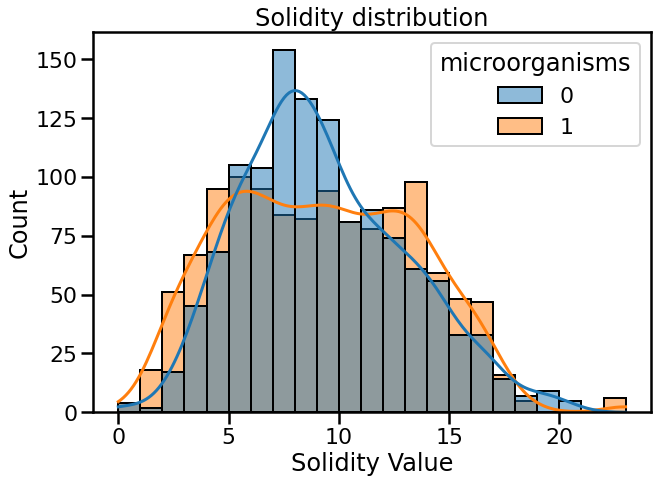

In [17]:
corr_map('Solidity')


**Observations**
1. Microogranisms with Solidity value of 0 to 5 and 12 to 17 is most likely to be Ulothrix.
2. Solidity value of around 23 is Ulothrix.
3. Solidity values of 5 to 12 and 17 to 21 is msot likely to be Not Ulothrix


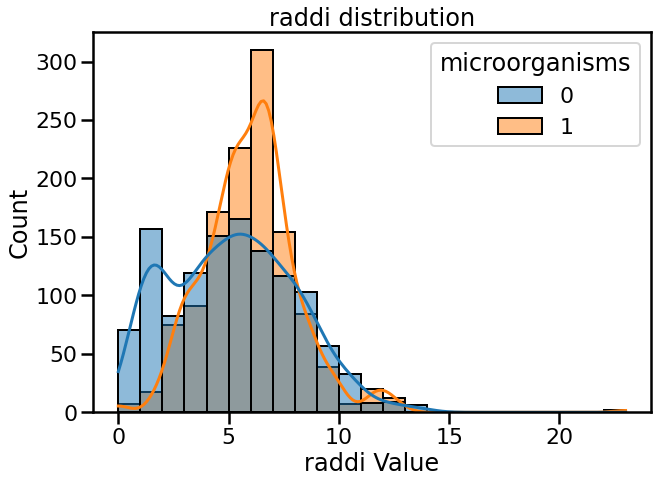

In [18]:
corr_map('raddi')


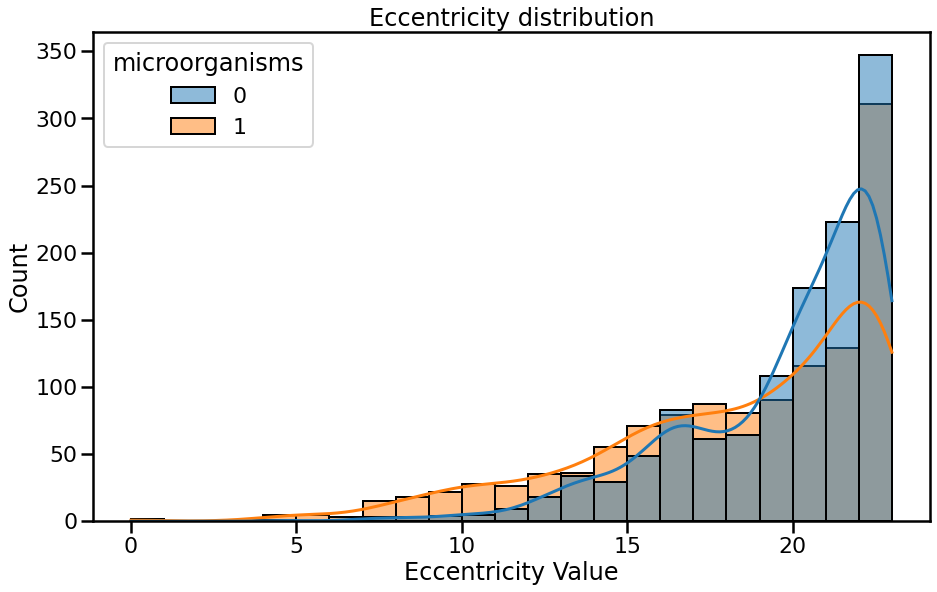

In [19]:
# Eccentricity
corr_map('Eccentricity', (15, 9))


**Observations**
1.I changed the size of the graph to see the bars on 0 to 5.

2. Eccentricity of 0 to 19 is most likely to be Ulothrix.
19 to 23 is most likely to be Not Ulothrix.


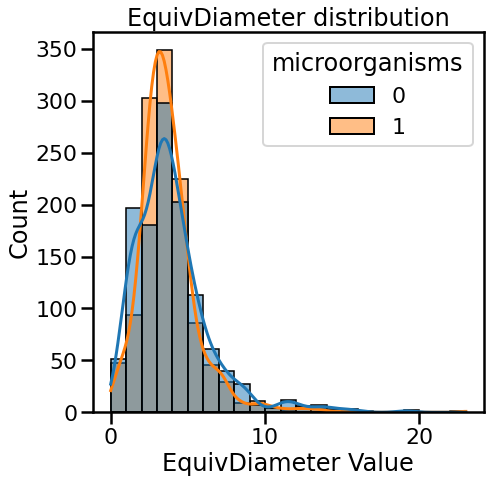

In [20]:
#EquivDiameter
corr_map('EquivDiameter', (7, 7))


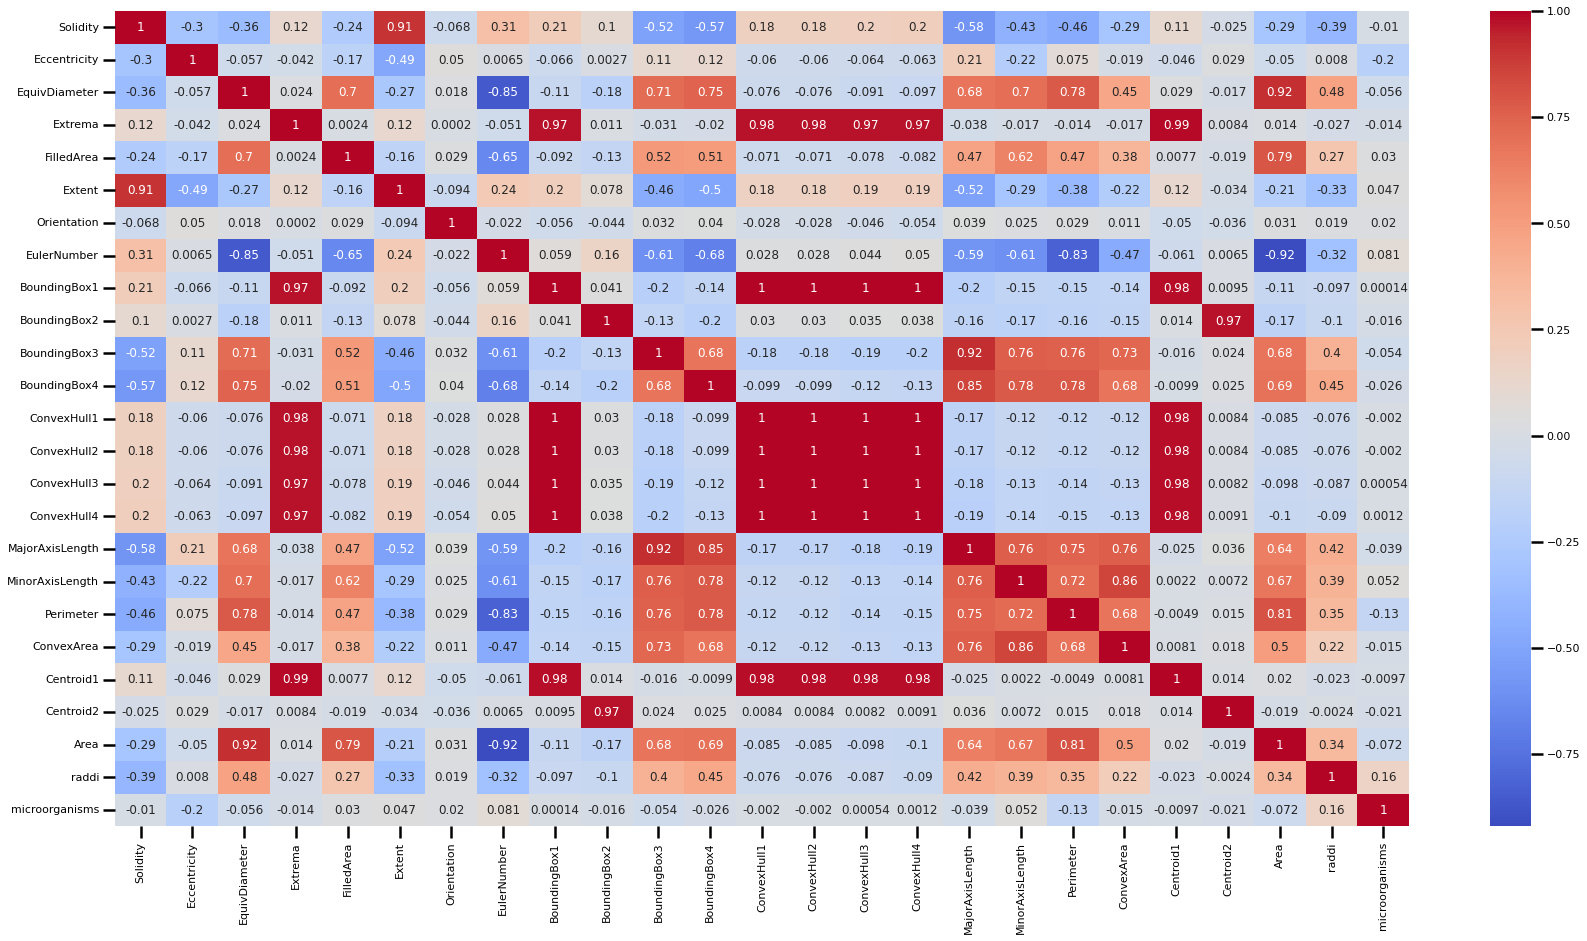

In [21]:
# heatmap graph for finding  correlation of column 
df.corr()
plt.figure(figsize=(29,15))
sns.set_context('poster', font_scale=0.5)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
#plt.title('R')
plt.show()


EquivDiameter of 2 to 5 is most likely to be Ulothrix.
EquivDiameter of 0 to 2 and 5 to 20 is most likely to be Not Ulothrix.
Not

# Baseline Models


In [22]:
# Note: Other features will be correlated soon
#Section 2: Baseline Models
#Using a simple model for having a baseline accuracy without removing any features.

# Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Copying dataset for testing baseline
baseline_data = df

# Separating into training and testing set
target = 'microorganisms'
y = baseline_data[target]
X = baseline_data.drop([target], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [23]:
# Making the model
baseline_model = DecisionTreeClassifier(criterion='entropy', random_state=1)
baseline_model.fit(X_train, y_train)

# Accuracy of the model
baseline_model.score(X_test, y_test)


0.6970074812967582

The accuracy above is bad. Need to do better.

In [24]:
# redistribute the unbalanced data with over sampling
from scipy import stats
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix

# display progress of loops
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


In [25]:
df.iloc[:,13:].describe()


,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,11.050618,10.980334,10.944788,1.674192,1.170418,0.848083,0.293139,11.718911,11.515825,0.874071,5.605006,0.500000
std,6.076406,6.131670,6.133196,1.726727,1.418368,1.166282,1.152295,6.050929,5.619340,1.296166,2.551067,0.500103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148000,0.236000,0.000000,0.000000,0.000000
25%,5.727500,5.645000,5.622500,0.708250,0.541250,0.296000,0.046025,6.540000,7.120000,0.290000,3.950000,0.000000
50%,11.000000,11.000000,10.900000,1.200000,0.849500,0.541000,0.095200,11.800000,11.100000,0.542000,5.675000,0.500000
75%,16.100000,16.000000,16.000000,2.080000,1.297500,0.968750,0.208000,16.900000,16.200000,0.963500,7.160000,1.000000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,22.700000,23.000000,23.000000,1.000000


In [26]:
# Normalize the Data
scaler = StandardScaler()
sc_df = scaler.fit_transform(df.iloc[:,:-1])#  target coulumn is microorganism
temp_y = df['microorganisms'].to_numpy()
sc_df = pd.DataFrame(np.hstack((sc_df, temp_y.reshape(-1, 1))), columns=df.columns)
sc_df.head()



,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0.707074,0.998085,-1.446461,-0.550085,-0.408684,-0.727518,0.620890,0.673978,-0.436826,0.985368,...,-0.450884,-0.778622,-0.783328,-0.666942,-0.252087,-0.580016,0.780355,-0.658670,-2.148173,0.0
1,0.931551,-0.948696,-0.230380,1.640620,-0.233094,1.501695,-1.641274,-0.046788,1.751692,0.529523,...,1.737659,-0.567775,-0.225953,-0.231624,-0.201412,1.682913,0.424368,-0.289429,-0.688091,0.0
2,-0.385380,0.524544,-0.859775,-1.007103,-0.359506,0.221150,0.244890,0.468045,-0.931848,0.424328,...,-0.949911,-0.528966,-0.466420,-0.423726,-0.223807,-1.049462,0.246374,-0.541763,-1.845492,0.0
3,-0.370415,0.919162,-1.283718,-1.895473,-0.398438,-0.592888,-1.337316,0.571012,-1.725348,1.406149,...,-1.744603,-0.692893,-0.719580,-0.596104,-0.245959,-1.912647,1.278736,-0.637604,-1.550653,0.0
4,0.607306,0.629775,0.853078,0.017876,0.188277,0.086521,-0.610885,-0.046788,0.107047,-0.852040,...,0.090544,0.101837,-0.035554,-0.231624,-0.080845,0.129112,-0.846506,0.452141,0.421477,0.0


In [27]:
sc_df = sc_df[(np.abs(stats.zscore(df.iloc[:,:-1])) < 3).all(axis=1)]
sc_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2429
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         2277 non-null   float64
 1   Eccentricity     2277 non-null   float64
 2   EquivDiameter    2277 non-null   float64
 3   Extrema          2277 non-null   float64
 4   FilledArea       2277 non-null   float64
 5   Extent           2277 non-null   float64
 6   Orientation      2277 non-null   float64
 7   EulerNumber      2277 non-null   float64
 8   BoundingBox1     2277 non-null   float64
 9   BoundingBox2     2277 non-null   float64
 10  BoundingBox3     2277 non-null   float64
 11  BoundingBox4     2277 non-null   float64
 12  ConvexHull1      2277 non-null   float64
 13  ConvexHull2      2277 non-null   float64
 14  ConvexHull3      2277 non-null   float64
 15  ConvexHull4      2277 non-null   float64
 16  MajorAxisLength  2277 non-null   float64
 17  MinorAxisLengt

Oversampling with SMOTE (Synthetic Minority Oversampling Technique)


In [28]:
X = sc_df.drop(['microorganisms'], axis=1).to_numpy()
y = sc_df['microorganisms'].to_numpy()
sm = SMOTE(random_state=42)
X_train_transformed, y_train_transformed = sm.fit_resample(X, y)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42 , shuffle=True)


In [30]:
# format scoring output
def score_format(model):
    print(f'Accuracy: {round(model * 100, 2)} %')

K-Nearest Neighbors

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(f'K-Nearest Neighbors')
score_format(knn.score(X_test, y_test))


K-Nearest Neighbors
Accuracy: 68.57 %


Random Forest



In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'Random Forest')
score_format(rf.score(X_test, y_test))


Random Forest
Accuracy: 78.36 %


Gradient Boosting


In [33]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print(f'*Gradient Boosting')
score_format(gb.score(X_test, y_test))


*Gradient Boosting
Accuracy: 76.46 %


Multi-Layer Perceptron

In [34]:
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train, y_train)
score_format(mlp.score(X_test, y_test))


Accuracy: 72.22 %


Cross Validation
Since we're using SMOTE, we'll be duplicating underrepresented data and this may affect our accuracy
Model accuracies suffer from overfitting when models pay too much attention to certain data points during training and cannot predict effectively on unseen points
Cross validation will allow us to determine how well each model generalizes on unseen data
Cross validation will treat the entire dataset as a training AND test set by splitting into K equal parts, and alternating training/test sets among those K-splits


In [35]:
models = [knn, rf, gb, mlp]


# Cross Validation


In [36]:
for model in models:
    scores = cross_val_score(estimator=model,
                         X=X,
                         y=y,
                         cv=10,
                         n_jobs=-1)
    print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')


CV accuracy: 0.697 +/- 0.037
CV accuracy: 0.787 +/- 0.023
CV accuracy: 0.783 +/- 0.030
CV accuracy: 0.739 +/- 0.024


 # Hyperparameter Tuning


In [37]:
# Hyperparameter Tuning
ints_ = [5,7,9, None]
param_grid = [{'n_neighbors': ints_[:-1], 
               'weights': ['uniform', 'distance']
              },
              {'criterion': ['gini', 'entropy'],
               'max_depth': ints_
              },
              {'max_depth': ints_[:-1]},
              {'hidden_layer_sizes': [(100,), (250,)], 
               'activation': ['logistic', 'tanh', 'relu'],
               'max_iter': [10000]
              }]

tuned_models = []
for i in tqdm(range(len(models))):    
    gs = GridSearchCV(models[i], 
                      param_grid[i], 
                      n_jobs = -1,
                      refit = True,
                      cv = 10,
                      return_train_score = True)
    best_model = gs.fit(X, y)
    tuned_models.append(best_model)


100%|██████████| 4/4 [14:47<00:00, 221.77s/it]


In [38]:
best_model

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (250,)],
                         'max_iter': [10000]},
             return_train_score=True)

In [39]:
for model in tuned_models:
    print(f'Best Params: {model.best_estimator_}')
    print(f'Best Score: {model.best_score_:.3f}')
    print()
    print()


Best Params: KNeighborsClassifier(weights='distance')
Best Score: 0.717


Best Params: RandomForestClassifier()
Best Score: 0.782


Best Params: GradientBoostingClassifier(max_depth=9)
Best Score: 0.823


Best Params: MLPClassifier(max_iter=10000)
Best Score: 0.738




*Best Params: GradientBoostingClassifier(max_depth=7)*
